# 分叉图绘制

## Logsitic Map   `逻辑斯蒂映射`   
"The logistic map is a famous chaotic system. This is an archetypal example of how chaos can arise from a very simple nonlinear equation. The logistic map models the evolution of a population, taking into account both reproduction and density-dependent mortality (starvation)." [ \[1\] ](https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/)  
    ——逻辑斯蒂映射是著名的**混沌系统**。这是说明混沌是如何由非常简单的非线性方程引起的的最典型例子。逻辑斯蒂映射不仅模拟了种群的进化，而且考虑了繁殖和密度依赖下的死亡率。  

- 作为一个形式简单的一维、二次映射，逻辑斯蒂映射通常被作为一个典型的非线性、具有混沌（*chaotic*）特性的动力学系统（*dynamical system*）。本质上Logisitic Map 是一个参数r-dependent的迭代映射（*iterative map*）, 它的数学形式(迭代方程）如下：
$$ x_{n+1}=rx_n(1-x_n) $$

## 几个$r$值下的$x_{n+1}$ vs $x_n$ 图

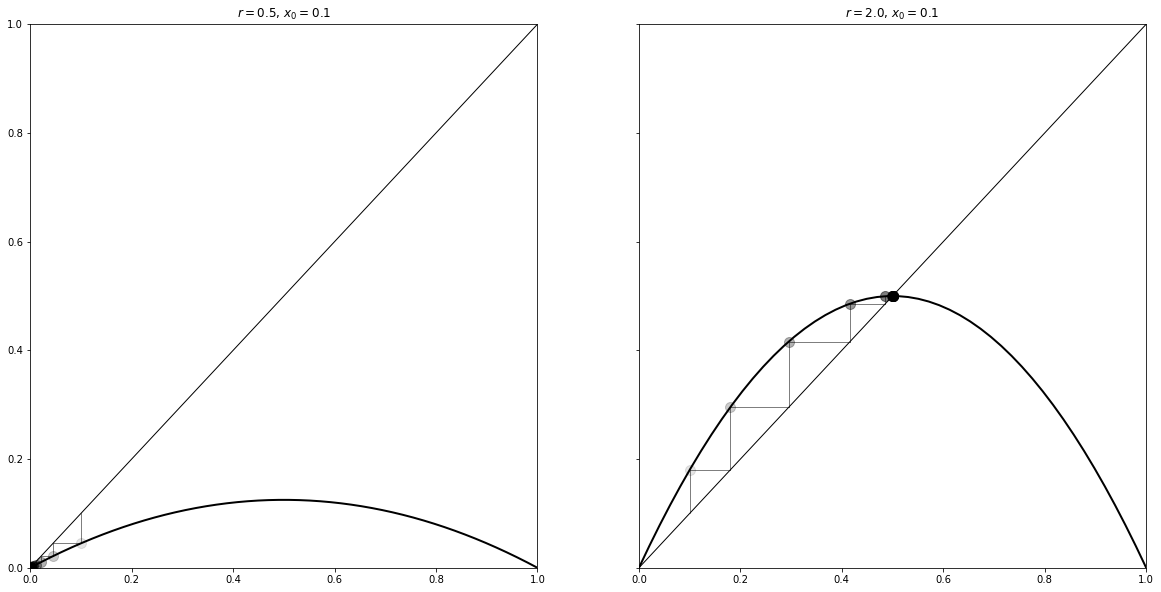

In [58]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def logistic(r,x):
    return r*x*(1-x)

    ax.set_title('Logisitc Map',fontstyle='italic')
    ax.set_xlabel('$x_n$', fontsize='x-large',fontfamily = 'sans-serif',)
    ax.set_ylabel('$x_{n+1}$', fontsize='x-large',fontstyle='oblique')

def plot_system(r, x0, n, ax=None):
    # vs 图
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    # 正比例函数
    ax.plot([0, 1], [0, 1], 'k', lw=1)

    x = x0
    for i in range(n):
        y = logistic(r, x)
        ax.plot([x, x], [x, y], 'k', lw=0.5)
        ax.plot([x, y], [y, y], 'k', lw=0.5)
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10),sharey=True)
plot_system(0.5, 0.1, 10, ax=ax1)
plot_system(2.0, 0.1, 10, ax=ax2)


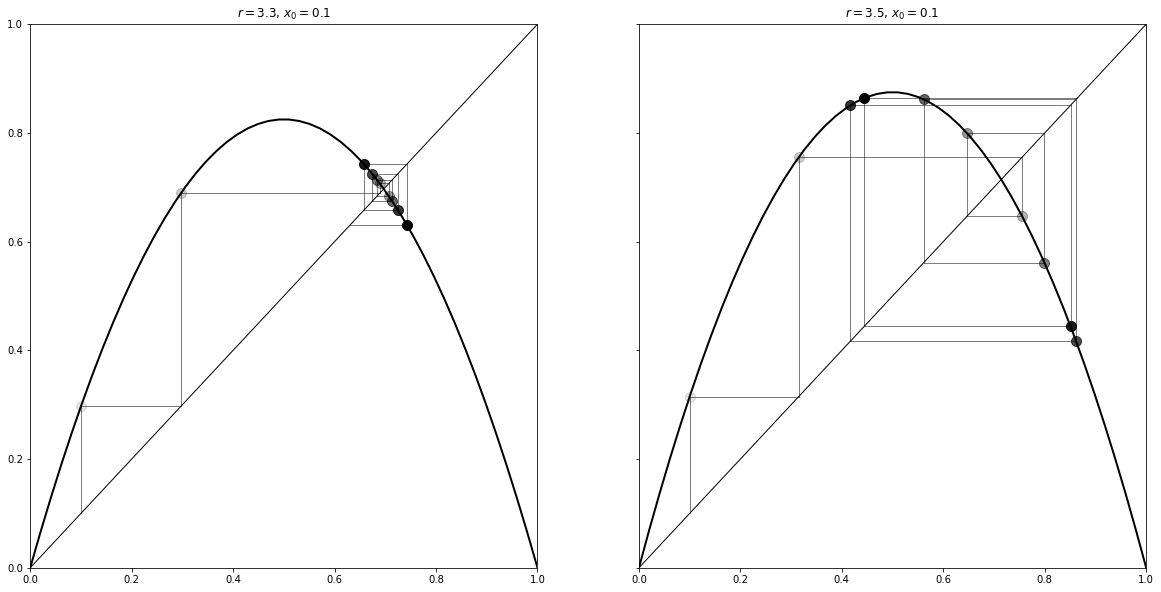

In [59]:
fig, (ax3,ax4) = plt.subplots(1,2,figsize=(20,10),sharey=True)
plot_system(3.3, 0.1, 10, ax=ax3)
plot_system(3.5, 0.1, 10, ax=ax4)

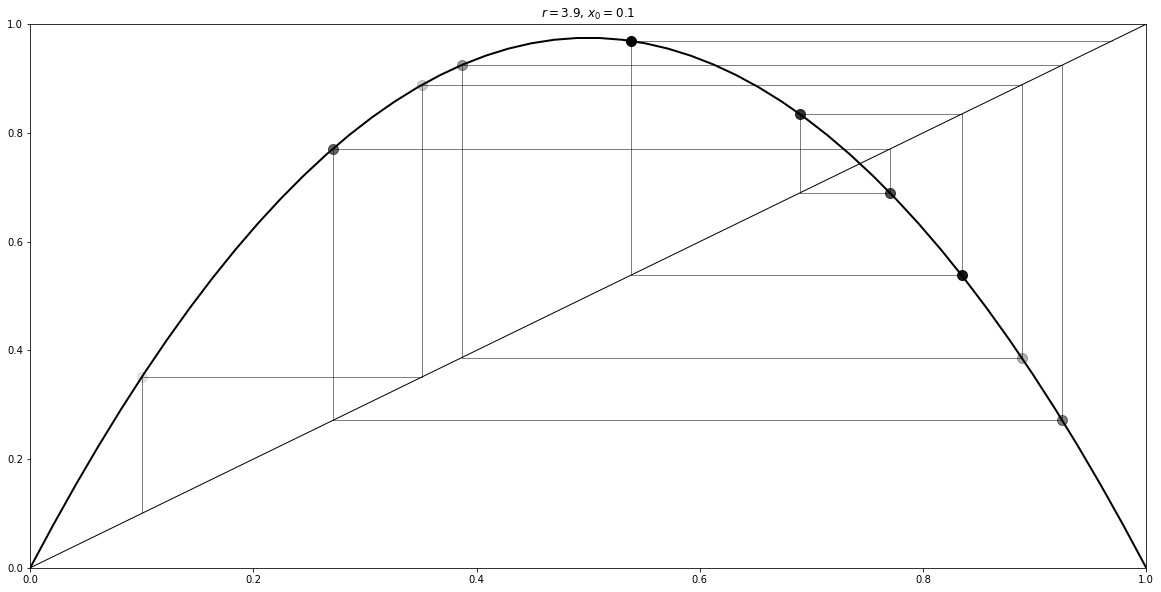

In [66]:
fig, (ax5) = plt.subplots(figsize=(20,10))
plot_system(3.9, 0.1, 10, ax=ax5)

## 探索动力学
在赋给某个初值x0启动迭代过程并经过长时间后，$x$随迭代步数$n$的图像。

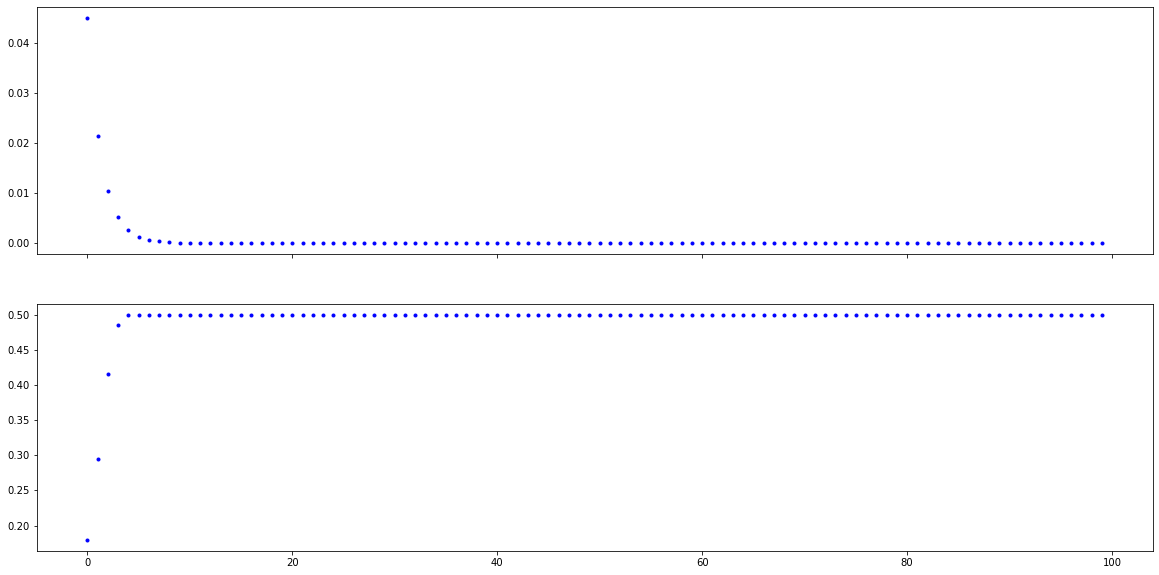

In [86]:
def iteration(r, x0, n,ax=None):   
    x = x0
    for i in range(n):
        y = logistic(r, x)
        ax.plot([i],[y],'b.',label='"$x_0={x0:.1f}$') #label无法显示？
        x = y
        
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$n$')
ax.set_ylabel('$x_n$', fontsize='x-large')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10),
                               sharex=True)

iteration(0.5,0.1,100,ax=ax1)
iteration(2.0,0.1,100,ax=ax2)
plt.show()

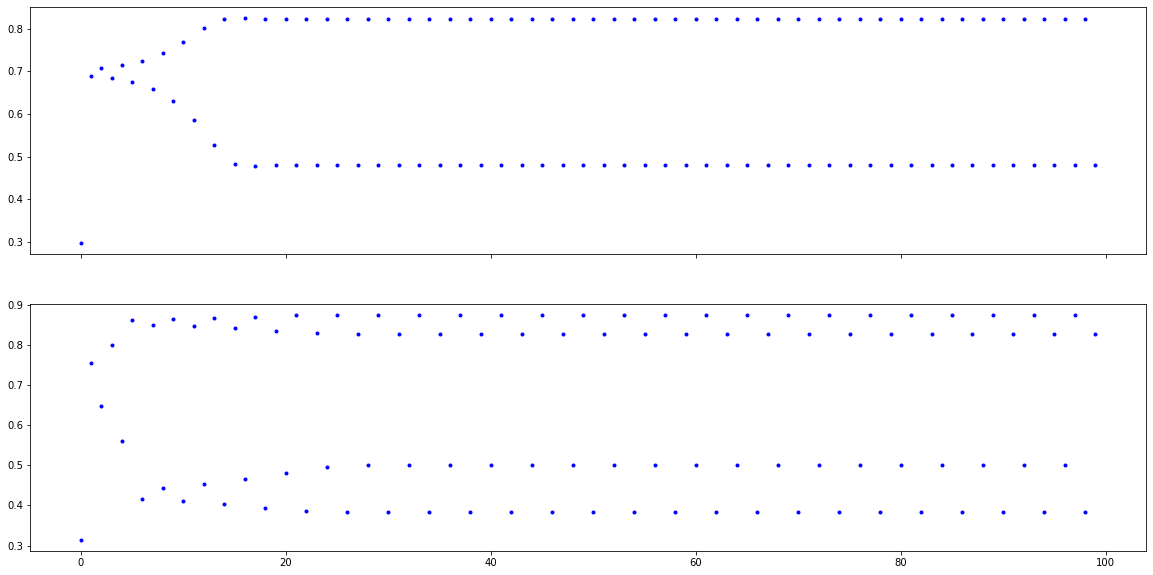

In [75]:
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(20,10),
                               sharex=True)
iteration(3.3,0.1,100,ax=ax3)
iteration(3.5,0.1,100,ax=ax4)

plt.show()

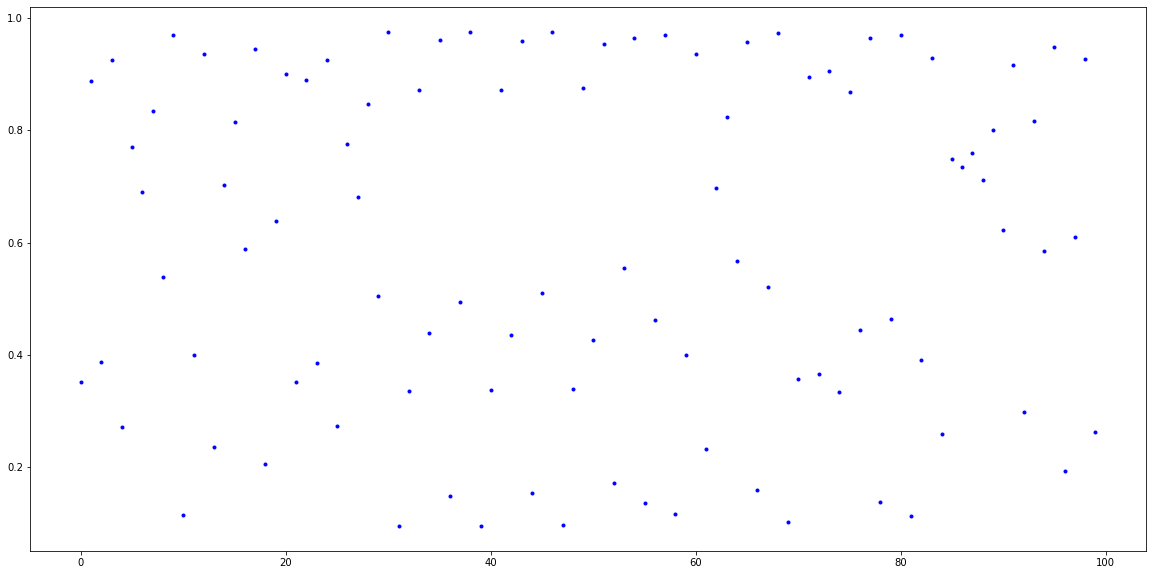

In [76]:
fig,ax5= plt.subplots(figsize=(20,10))

iteration(3.9,0.1,100,ax=ax5)

## 分岔图 （Bifurcation Diagram）

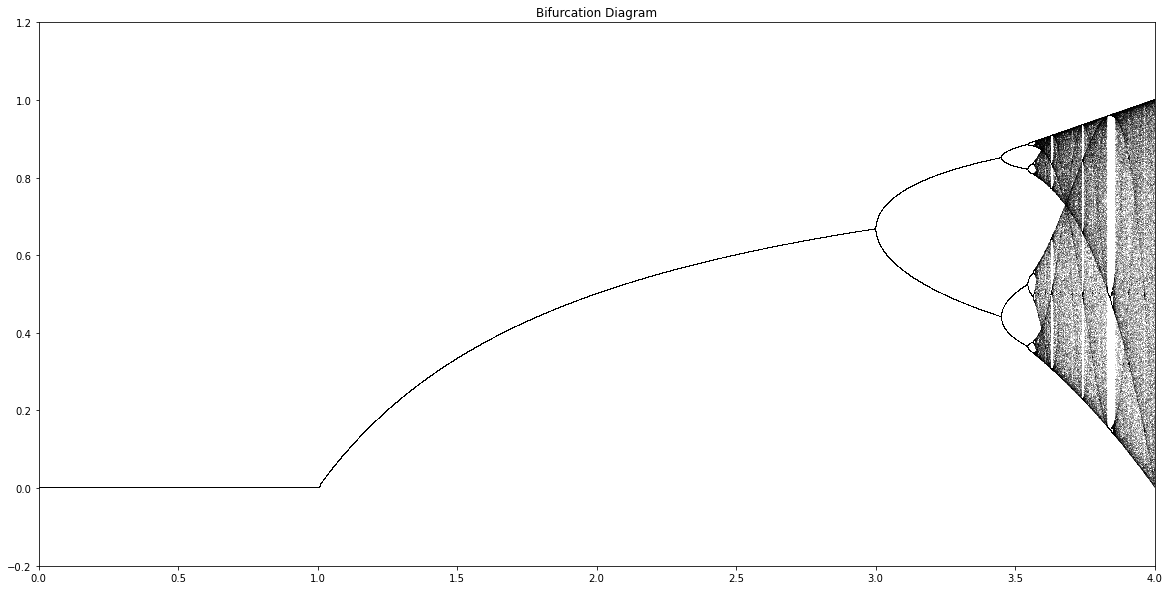

In [61]:
fig,ax = plt.subplots(figsize=(20, 10))

n = 10000
r = np.linspace(1e-5, 4.0, n)
lyapunov = np.zeros(n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

for i in range(iterations):
    x = logistic(r, x)
    # Compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # Display the bifurcation diagram.
    if i >= (iterations - last):
        ax.plot(r, x, ',k', alpha=0.2 ,lw=1)

ax.set_title("Bifurcation Diagram")
ax.set_xlim(0, 4)
ax.set_ylim(-0.2, 1.2)


100%|████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:00<00:00, 6109.32it/s]


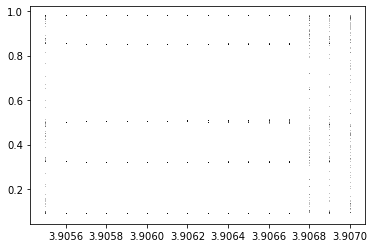

100%|████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:00<00:00, 5944.06it/s]


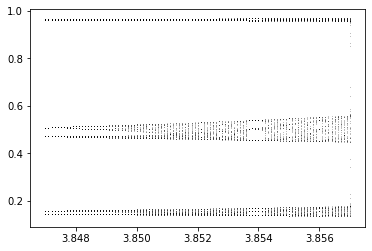

100%|████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:00<00:00, 6042.60it/s]


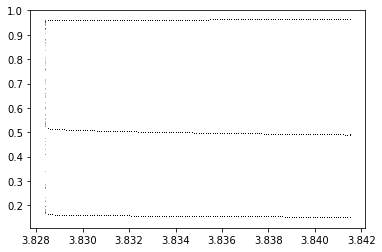

In [77]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

def LogisticMap(a,b):
    r = np.arange(a,b, 0.0001)
    x = 0.2  
    iters = 1000  
    last = 100  
    for i in tqdm(range(iters+last)):
        x = r * x * (1 - x)
        if i >= iters:
            plt.plot(r, x, ',k', alpha=0.25) 
    plt.show()

LogisticMap(3.9055,3.9070)
LogisticMap(3.8470,3.8570)
LogisticMap(3.8284,3.8415)

# 红色方框里的提示语什么意思？ 是因为 plt.和 ax. 混用吗？但图像似乎是正确的

- 变化趋势：
稳定值数目逐渐增加，直到最后变为混沌。

**日后需要研究一下如何把两个图片合为一张，并用不同标签及颜色等进行标注。**

_P.S._ 下图为系统的李雅普诺夫函数，它显示了可能的长期行为(平衡、不动点、周期轨道和混沌轨迹)作为系统参数的函数。我们还将计算系统的李雅普诺夫指数的近似，以描述模型对初始条件的敏感性。[\[2\]](https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/)

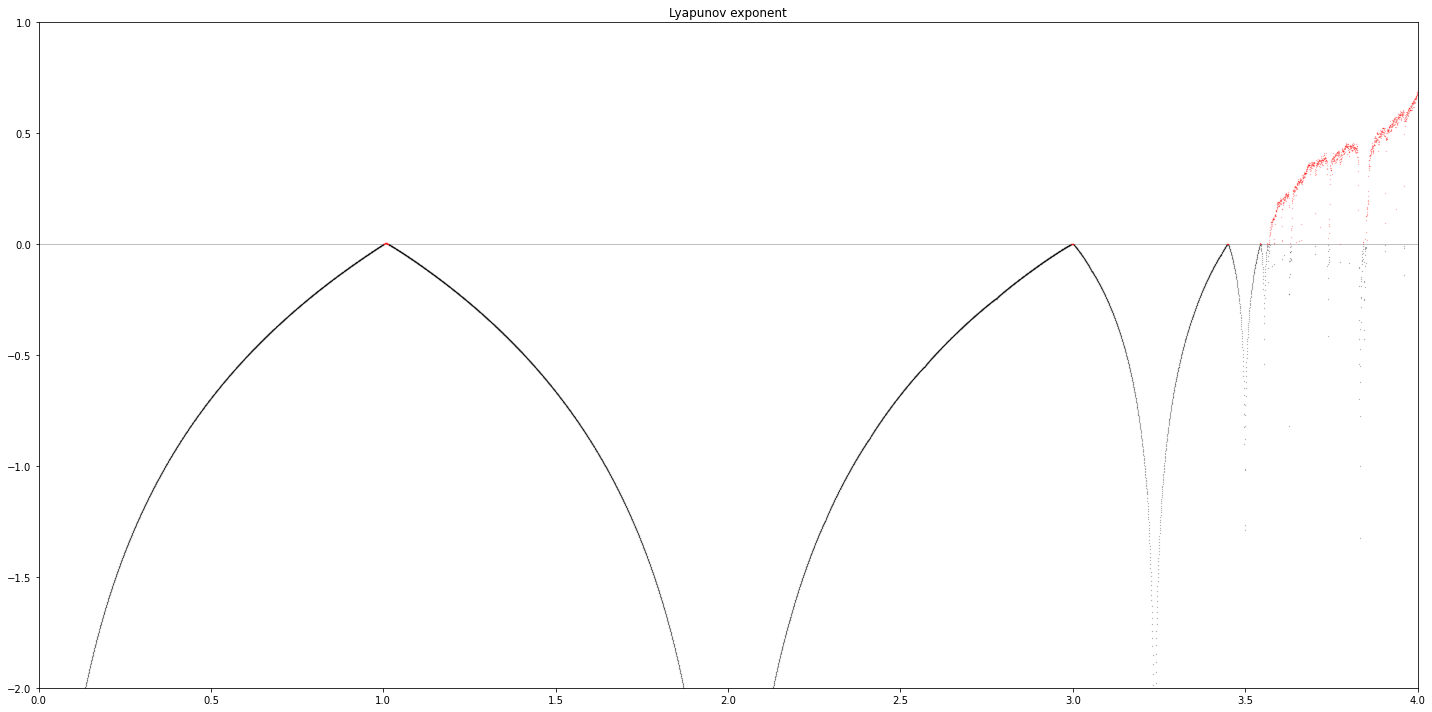

In [78]:
fig,ax = plt.subplots(figsize=(20, 10))

iterations = 1000
last = 100
n = 10000
r = np.linspace(0, 4.0, n)

# We display the Lyapunov exponent.
# Horizontal line.
ax.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax.set_xlim(0, 4)
ax.set_ylim(-2, 1)
ax.set_title("Lyapunov exponent")

plt.tight_layout()

# 不动点的求解

## 利用`sympy`进行求解

- 周期一
$$ x^*=rx^*(1-x^*)$$

In [79]:
from sympy import *
init_printing(use_unicode=True) # 显示漂亮的数学公式
x,r = symbols('x r') 

f = r*x*(1-x) # Logistic map
ff = r*f*(1-f) # f(f(x))
fff = r*ff*(1-ff) # f(f(f(x)))

L = solve(f-x,x)

In [80]:
L

- 周期二轨道
$$ \left\{
\begin{aligned}
x^*_1 & = rx^*_2(1-x^*_2)\\
x^*_2 & = rx^*_1(1-x^*_1)
\end{aligned}
\right.$$

   上面的方程组可以等价变为：$x^*_1=f(f(x^*\_1))$ 或者 $x^*_2=f(f(x^*_2))$ 。  
    换句话说，**周期二轨道是函数 $f^2=f(f(x))$ 的不动点**，即满足方程 $x=f^2(x)$ 的解。

In [81]:
LL = solve(ff-x,x)

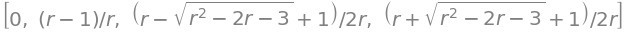

In [82]:
LL

- 以此类推，周期 $n
$ 轨道就是方程 $x=f^n(x)$ 的解，其中 $$f^n(x) : = \overbrace{f(f(\cdots f}^n(x)))$$

In [83]:
LLL = solve(fff-x,x)

In [84]:
LLL

*看来已经不能求解了*